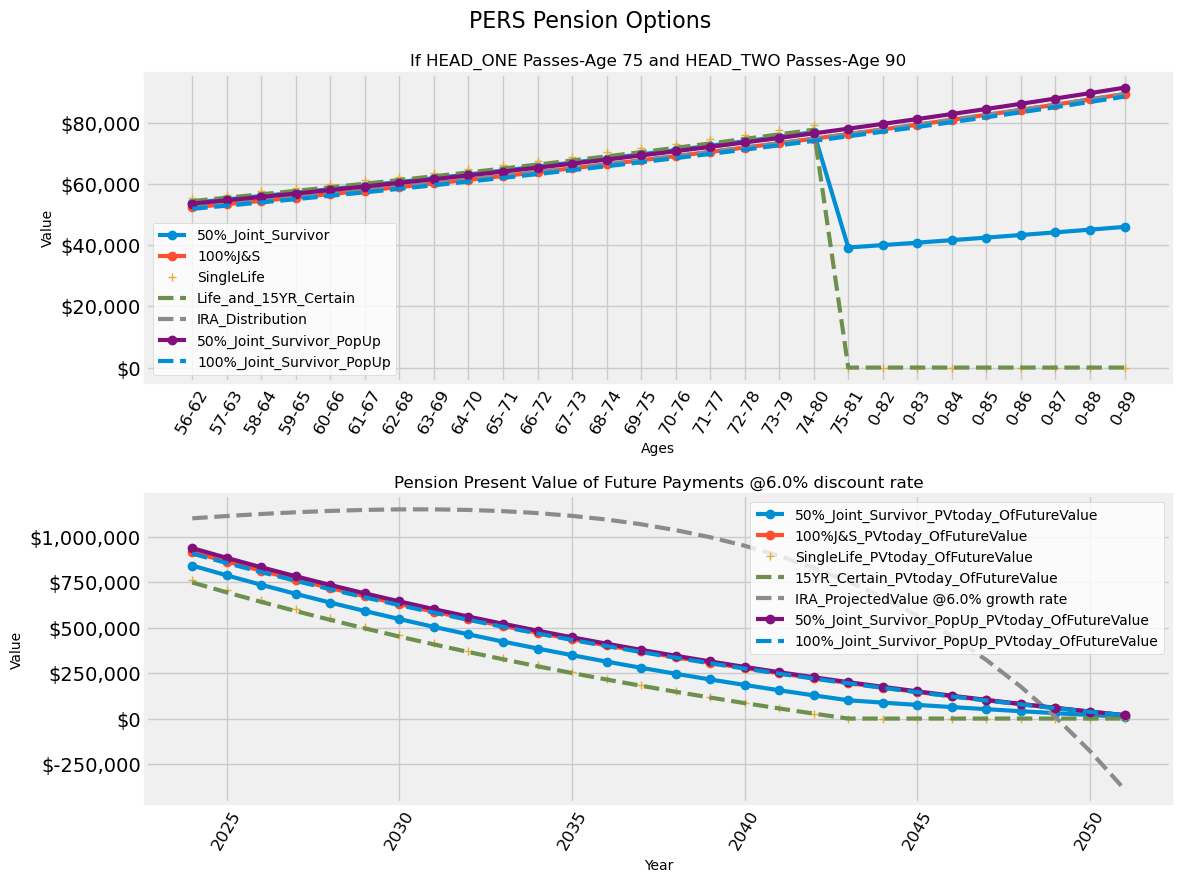

'presentation_table'

,HEAD_ONE_Age,HEAD_TWO_Age,SingleLife,Life_and_15YR_Certain,100%_Joint_Survivor,50%_Joint_Survivor,100%_Joint_Survivor_PopUp,50%_Joint_Survivor_PopUp,IRA_Distribution,50%_Joint_Survivor_PopUp_SINGLELIFE,100%_Joint_Survivor_PopUp_SINGLELIFE,IRA_ProjectedValue,IRA_Withdrawal_Rate
Year,,,,,,,,,,,,,
2024,56,62,"55,402","54,410","52,355","53,851","51,856","53,574","52,355","55,402","55,402","1,100,000",4.76%
2025,57,63,"56,510","55,498","53,402","54,928","52,893","54,645","53,402","56,510","56,510","1,112,598",4.80%
2026,58,64,"57,640","56,608","54,470","56,027","53,951","55,738","54,470","57,640","57,640","1,123,752",4.85%
2027,59,65,"58,793","57,740","55,560","57,147","55,030","56,853","55,560","58,793","58,793","1,133,238",4.90%
2028,60,66,"59,969","58,895","56,671","58,290","56,131","57,990","56,671","59,969","59,969","1,140,812",4.97%
2029,61,67,"61,168","60,073","57,804","59,456","57,253","59,150","57,804","61,168","61,168","1,146,201",5.04%
2030,62,68,"62,392","61,274","58,960","60,645","58,398","60,333","58,960","62,392","62,392","1,149,105",5.13%
2031,63,69,"63,639","62,500","60,139","61,858","59,566","61,540","60,139","63,639","63,639","1,149,193",5.23%
2032,64,70,"64,912","63,750","61,342","63,095","60,758","62,770","61,342","64,912","64,912","1,146,100",5.35%


In [4]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sns
from icecream import ic

pd.set_option('display.max_rows', None)  #this prints out all rows of data
pd.set_option('display.max_columns', None)

plt.figure(figsize=(12, 9))
G = gridspec.GridSpec(ncols=1, nrows=2)

def figure_yearly_pensions():
    #sns.set_style("darkgrid")
    """set up the cols here"""
    x_data = df_base["Ages"]
    y_data1 = df_base["50%_Joint_Survivor"]
    y_data1b = df_base["50%_Joint_Survivor_PopUp"]
    y_data7 = df_base["SingleLife"]
    y_data8 = df_base["100%_Joint_Survivor"]
    y_data8b = df_base["100%_Joint_Survivor_PopUp"]
    y_data10 = df_base['IRA_Distribution']
    y_data12 = df_base["Life_and_15YR_Certain"]
    """plot"""
    plt.style.use('fivethirtyeight')
    bar_width = 0.6
    lwidth = 3
    axes_1 = plt.subplot(G[0, 0])  #left row 1
    axes_1.plot(x_data,
                y_data1,
                '-o',
                #color='blue',
                label='50%_Joint_Survivor',
                linewidth=lwidth)
    axes_1.plot(x_data,
                y_data8,
                '-o',
                #color='green',
                label='100%J&S',
                linewidth=lwidth)
    axes_1.plot(x_data,
                y_data7,
                '+',
                #color='red',
                label='SingleLife',
                linewidth=lwidth)
    axes_1.plot(x_data,
                y_data12,
                '--',
                #color='orange',
                label='Life_and_15YR_Certain',
                linewidth=lwidth)  #2022-03-23 17:29:13
    axes_1.plot(x_data,
                y_data10,
                '--',
                #color='black',
                label='IRA_Distribution',
                linewidth=lwidth)
    axes_1.plot(x_data, #2022-03-31 18:14:36 
                y_data1b,
                '-o',
                #color='blue',
                label='50%_Joint_Survivor_PopUp',
                linewidth=lwidth)
    
    axes_1.plot(x_data, #2022-03-31 18:14:36 
                y_data8b,
                '--',
                #color='blue',
                label='100%_Joint_Survivor_PopUp',
                linewidth=lwidth) 
    axes_1.set_xlabel('Ages', fontsize=10)
    axes_1.set_ylabel('Value', fontsize=10)
    axes_1.grid(True)
    axes_1.legend(fontsize=10, facecolor="white", loc=0)
    plt.xticks(rotation=60, fontsize=12)
    plt.gca().yaxis.set_major_formatter('${x:,.0f}')
    plt.title('If ' + str(head1name) + ' Passes-Age ' + str(head1lifeexp) +
              ' and ' + str(head2name) + ' Passes-Age ' + str(head2lifeexp),
              fontsize=12)
    return axes_1


def figure_yearly_presentvalues():
    """set up the pv cols here"""
    global discount_rate
    x_data = df_tvmusingbase['Year']
    y_data1 = df_tvmusingbase["50%_Joint_Survivor_PVtoday_OfFutureValue"]
    y_data1b = df_tvmusingbase["50%_Joint_Survivor_PopUp_PVtoday_OfFutureValue"]
    y_data7 = df_tvmusingbase["SingleLife_PVtoday_OfFutureValue"]
    y_data8 = df_tvmusingbase["100%_Joint_Survivor_PVtoday_OfFutureValue"]
    y_data8b = df_tvmusingbase["100%_Joint_Survivor_PopUp_PVtoday_OfFutureValue"]
    y_data12 = df_tvmusingbase["15YR_Certain_PVtoday_OfFutureValue"]
    y_data10 = df_tvmusingbase["IRA_ProjectedValue"]
    
    """plot"""    
    plt.style.use('fivethirtyeight')
    bar_width = 0.6
    lwidth = 3
    axes_2 = plt.subplot(G[1, 0])  #one col second row
    axes_2.plot(x_data,
                y_data1,
                '-o',
                #color='blue',
                label='50%_Joint_Survivor_PVtoday_OfFutureValue',
                linewidth=lwidth)
    axes_2.plot(x_data,
                y_data8,
                '-o',
                #color='green',
                label='100%J&S_PVtoday_OfFutureValue',
                linewidth=lwidth)  #2022-03-23 17:52:49
    axes_2.plot(x_data,
                y_data7,
                '+',
                #color='red',
                label='SingleLife_PVtoday_OfFutureValue',
                linewidth=lwidth)
    axes_2.plot(x_data,
                y_data12,
                '--',
                #color='orange',
                label='15YR_Certain_PVtoday_OfFutureValue',
                linewidth=lwidth)  #2022-03-23 17:30:07
    axes_2.plot(x_data,
                y_data10,
                '--',
                #color='black',
                label='IRA_ProjectedValue @' + ira_rate_text + '% growth rate',
                linewidth=lwidth)
    ########labels on IRA.
    #2022-03-31 18:41:54 
    axes_2.plot(x_data,
                y_data1b,
                '-o',
                #color='blue',
                label='50%_Joint_Survivor_PopUp_PVtoday_OfFutureValue',
                linewidth=lwidth)
    
    axes_2.plot(x_data,
                y_data8b,
                '--',
                #color='blue',
                label='100%_Joint_Survivor_PopUp_PVtoday_OfFutureValue',
                linewidth=lwidth)
    
    #annotate_ax(x_data,y_data10,axes_2)
    ############
    axes_2.set_xlabel('Year', fontsize=10)
    axes_2.set_ylabel('Value', fontsize=10)
    axes_2.grid(True)
    axes_2.legend(fontsize=10, facecolor="white", loc=0)
    #white is default don't need this here
    #loc = 0 is best, 1 upper right: 1; upper left: 2; lower left: 3; lower right: 4; right: 5; center left: 6;
    #center right: 7; lower center: 8; upper center: 9; center: 10;
    #plt.xlim(start_year, end_year)
    #Manually set top value scale to match eMoney Decision Center
    #plt.ylim(1, 50000000)
    plt.xticks(rotation=60, fontsize=12)
    plt.gca().yaxis.set_major_formatter('${x:,.0f}')
    plt.title('Pension Present Value of Future Payments @' +
              discount_rate_text + '% discount rate',
              fontsize=12)
    plt.suptitle(str(pensionname), fontsize=16)
    return axes_2


###################
#### To be done if want to do correctly:
#10yr certain needs to end if he dies within 10 yrs.
#50% contingent drops by 50% at either death.
#15 yr certian with popup, same thing, if ute dies within the 15 yrs, end it after 15th yr.

# create initial df for computations of future values, that is indexed yearly values colas
lumpsum_value = 1_100_000
ira_growth_rate = .06
#print(f'Value: {lumpsum_value}')
discount_rate = ira_growth_rate
discount_rate_pvoffuture = discount_rate
delayed_yrs_to_start = 0
start_year = 2024
pension_cola = .02

head1age = 54 + 2
head1name = 'HEAD_ONE'
head1lifeexp = 75
head1_yearofDeath_lifeexp = head1lifeexp - head1age + start_year
#ic(head1_yearofDeath_lifeexp)

head2age = 60 + 2
head2name = 'HEAD_TWO'
head2lifeexp = 90
head2_yearofDeath_lifeexp = head2lifeexp - head2age + start_year

#ic(head2_yearofDeath_lifeexp)
pensionname = 'PERS Pension Options'
maximum = max(head1_yearofDeath_lifeexp, head2_yearofDeath_lifeexp)
num_rows = maximum - start_year
#ic(num_rows)

discount_rate_text_conv = np.round_(discount_rate * 100, decimals=2)
discount_rate_text = str(discount_rate_text_conv)
ira_rate_text_conv = np.round_(ira_growth_rate * 100, decimals=2)
ira_rate_text = str(ira_rate_text_conv)

a = head1_yearofDeath_lifeexp
b = head2_yearofDeath_lifeexp
c = min(
    head1_yearofDeath_lifeexp, head2_yearofDeath_lifeexp
)  #used for drop at first death. did not need to look up. that's scary....
d = max(head1_yearofDeath_lifeexp,
        head2_yearofDeath_lifeexp)  #use for if same age
#ic(a,b,c,d)

if (a > b):  #head 1 age greater than head 2
    #year_to_drop_joint_options = b #use if pension drops at pensionee death.
    year_to_drop_joint_options = a
elif (b > a):  #head 2 age greater than head 1
    year_to_drop_joint_options = a
else:
    print(
        "Both are passing in same year, they are Equal. The calcs can be messed up"
    )
    year_to_drop_joint_options = d  #max yr if death in same year

#this is the ordering of cols
col_names = [
    'Number', 'Year', 'Head1_Age', 'Head2_Age', 'SingleLife',
    'Life_and_15YR_Certain', '100%_Joint_Survivor', '50%_Joint_Survivor',
    '100%_Joint_Survivor_PopUp', '50%_Joint_Survivor_PopUp', 'IRA_Distribution'
]
#'50%_Contingent', "10-yr_Certain_and_50%J&S",
df_base = pd.DataFrame(index=range(num_rows), columns=col_names)
df_base = df_base.apply(pd.to_numeric, errors='coerce')
df_base[col_names] = df_base[col_names].apply(pd.to_numeric, errors='coerce')
# Create year numbers
df_base.Number = range(1, 1 + num_rows)
df_base.Year = range(start_year, start_year + num_rows)
df_base.Head1_Age = range(head1age, head1age + num_rows)
df_base.Head2_Age = range(head2age, head2age + num_rows)
df_base.loc[head2lifeexp - head2age + 1:num_rows, 'Head2_Age'] = 0
df_base.loc[head1lifeexp - head1age + 1:num_rows, 'Head1_Age'] = 0


def future_value(rate, x, pv):
    fv = npf.fv(rate, x, 0, -pv, when='begin')
    return fv


for x in range(delayed_yrs_to_start, num_rows):
    df_base.at[(x), 'SingleLife'] = future_value(pension_cola, x, int(55_402))
    df_base.at[(x),
               '50%_Joint_Survivor'] = future_value(pension_cola, x,
                                                    int(53_851))
    df_base.at[(x),
               '100%_Joint_Survivor'] = future_value(pension_cola, x,
                                                     int(52_355))
    df_base.at[(x),
               'Life_and_15YR_Certain'] = future_value(pension_cola, x,
                                                       int(54_410))
    """columns to use with starting popup amts"""  #2022-03-31 18:09:54
    df_base.at[(x), '50%_Joint_Survivor_PopUp'] = future_value(
        pension_cola,
        x,  #2022-03-31 17:59:19 
        int(53_574))
    df_base.at[(x), '100%_Joint_Survivor_PopUp'] = future_value(
        pension_cola,
        x,  #2022-03-31 17:59:22 
        int(51_856))
    """columns to use at death of head2 equal to single life"""
    df_base.at[(x), '50%_Joint_Survivor_PopUp_SINGLELIFE'] = future_value(
        pension_cola,
        x,  #2022-03-31 17:59:19 
        int(55_402))
    df_base.at[(x), '100%_Joint_Survivor_PopUp_SINGLELIFE'] = future_value(
        pension_cola,
        x,  #2022-03-31 17:59:22 
        int(55_402))
    """use at death of head2 equal to single life"""  
    df_base['50%_Joint_Survivor_PopUp'] = np.where(
        df_base.Year >= head2_yearofDeath_lifeexp, df_base['50%_Joint_Survivor_PopUp_SINGLELIFE'],
        df_base['50%_Joint_Survivor_PopUp'])   
    df_base['100%_Joint_Survivor_PopUp'] = np.where(
        df_base.Year >= head2_yearofDeath_lifeexp, df_base['100%_Joint_Survivor_PopUp_SINGLELIFE'],
        df_base['100%_Joint_Survivor_PopUp'])
df_base['50%_Joint_Survivor'] = np.where(
    df_base.Year >= year_to_drop_joint_options,
    df_base['50%_Joint_Survivor'] * .5, df_base['50%_Joint_Survivor'])

#df_base['10YR_Certain'] = np.where(df_base.Year>=year_to_drop_joint_options, df_base['75%J&S']*.75, df_base['75%J&S'])
"""
10 yr certain, notice to add to head1 age + 10, end 9, and start 10 after locs.
"""
#if (head1lifeexp <= head1age + 10):
#df_base.loc[0:9, 'Life_and_10YR_Certain']
#df_base.loc[10:num_rows, 'Life_and_10YR_Certain'] = 0
##ic('1',df_base['Life_and_10YR_Certain'])

#df_base.loc[0:9, '10-yr_Certain_and_50%J&S'] # = int(34_990)
#df_base.loc[10:num_rows, '10-yr_Certain_and_50%J&S'] = int(20_822)
"""
15 yr certain, notice to add to head1 age + 15, end 14, and start 15 after locs. 2022-03-23 17:38:19
"""
if (head1lifeexp <= head1age + 15):
    df_base.loc[0:15, 'Life_and_15YR_Certain']
    df_base.loc[15:num_rows, 'Life_and_15YR_Certain'] = 0
#15 yr certain
if (head1lifeexp > head1age + 15):
    df_base['Life_and_15YR_Certain'] = np.where(
        df_base.Year >= head1_yearofDeath_lifeexp, 0,
        df_base['Life_and_15YR_Certain'])
df_base['100%_Joint_Survivor'] = np.where(
    df_base.Year >= year_to_drop_joint_options, df_base['100%_Joint_Survivor'],
    df_base['100%_Joint_Survivor'])
df_base['SingleLife'] = np.where(df_base.Year >= head1_yearofDeath_lifeexp, 0,
                                 df_base['SingleLife'])
#make IRA distribution equal to 100% J&S. Hopefully if their is a COLA it will work.
#df_base['IRA_Distribution'] = df_base['100%_Joint_Survivor'][0]
df_base['IRA_Distribution'] = df_base['100%_Joint_Survivor']
#############################

# FOR GRAPH
df_base["Ages"] = df_base.Head1_Age.astype(
    str) + "-" + df_base.Head2_Age.astype(str)
df_base = df_base.fillna(0)

#......................................................
def pv_column(fv):
    import pandas as pd
    pmt = 0
    # THIS NEEDS TO BE INPUT
    #discount_rate = 0.035
    #create an empty dataframe to place pandas
    df_tvm = pd.DataFrame(columns=[])
    #below actually added FV to column. it was N/A's as FV.
    df_tvm['fv_numeric'] = pd.to_numeric(fv, errors='coerce')
    initial_value = 0
    df_tvm['Counter'] = range(initial_value, len(df_tvm) + initial_value)
    #this creates a pv column for each year.
    df_tvm['pv'] = np.where((df_tvm["fv_numeric"] >= 0),
                            npf.pv(discount_rate,
                                   df_tvm['Counter'],
                                   pmt,
                                   -df_tvm["fv_numeric"],
                                   when='begin'), 0)
    df_tvm['Year'] = pd.to_numeric(df_base.Year, errors='coerce')
    present_value = df_tvm.pv
    #display(df_tvm)
    return present_value  #pass to function


#................................................
# create an empty dataframe to put new columns and values in this works so nicely.
#don't need to define any thing just add.
df_tvmusingbase = pd.DataFrame(columns=[])
df_tvmusingbase['Year'] = range(start_year, start_year + num_rows)
# This computes the present value of cash flows, starting in yr 1 to end, 2 to end, 3 to end, etc. Each
#  year has the future present value of cash flows as if the pension started in that future year.
for r in range(0, num_rows):
    df_tvmusingbase.at[(r),'50%_Joint_Survivor_PVOfFuture_AnnualCashFlows'] \
        = npf.npv(discount_rate_pvoffuture, df_base['50%_Joint_Survivor'][r:num_rows])
    df_tvmusingbase.at[(r),'SingleLife_PVOfFuture_AnnualCashFlows'] \
        = npf.npv(discount_rate_pvoffuture, df_base['SingleLife'][r:num_rows])
    df_tvmusingbase.at[(r),'100%_Joint_Survivor_PVOfFuture_AnnualCashFlows'] \
        = npf.npv(discount_rate_pvoffuture, df_base["100%_Joint_Survivor"][r:num_rows])
    df_tvmusingbase.at[(r),'15YR_Certain_PVOfFuture_AnnualCashFlows'] \
        = npf.npv(discount_rate_pvoffuture, df_base["Life_and_15YR_Certain"][r:num_rows]) #2022-03-23 17:43:34
    #2022-03-31 18:39:38  
    df_tvmusingbase.at[(r),'50%_Joint_Survivor_PopUp_PVOfFuture_AnnualCashFlows'] \
        = npf.npv(discount_rate_pvoffuture, df_base["50%_Joint_Survivor_PopUp"][r:num_rows])
    df_tvmusingbase.at[(r),'100%_Joint_Survivor_PopUp_PVOfFuture_AnnualCashFlows'] \
        = npf.npv(discount_rate_pvoffuture, df_base["100%_Joint_Survivor_PopUp"][r:num_rows])
"""
This present values the future value of each year from above back to today using the function from above.
2022-03-31 18:21:10 
"""    
df_tvmusingbase['50%_Joint_Survivor_PVtoday_OfFutureValue'] = \
    pv_column(df_tvmusingbase['50%_Joint_Survivor_PVOfFuture_AnnualCashFlows'])
df_tvmusingbase['SingleLife_PVtoday_OfFutureValue'] = \
    pv_column(df_tvmusingbase['SingleLife_PVOfFuture_AnnualCashFlows'])
df_tvmusingbase['100%_Joint_Survivor_PVtoday_OfFutureValue'] = \
    pv_column(df_tvmusingbase['100%_Joint_Survivor_PVOfFuture_AnnualCashFlows'])
 #2022-03-31 18:39:22 
df_tvmusingbase['50%_Joint_Survivor_PopUp_PVtoday_OfFutureValue'] = \
    pv_column(df_tvmusingbase['50%_Joint_Survivor_PopUp_PVOfFuture_AnnualCashFlows'])
df_tvmusingbase['100%_Joint_Survivor_PopUp_PVtoday_OfFutureValue'] = \
    pv_column(df_tvmusingbase['100%_Joint_Survivor_PopUp_PVOfFuture_AnnualCashFlows'])
df_tvmusingbase['15YR_Certain_PVtoday_OfFutureValue'] = \
    pv_column(df_tvmusingbase['15YR_Certain_PVOfFuture_AnnualCashFlows'])

for t in range(delayed_yrs_to_start, num_rows):
    #the right side could have been in fv but this makes it clearer for future reference. what a fucker. 01/05/2022
    IRA_Distribution_at = df_base.at[(t), 'IRA_Distribution']
    df_tvmusingbase.at[(t),
                       'IRA_ProjectedValue'] = npf.fv(ira_growth_rate, t,
                                                      IRA_Distribution_at,
                                                      int(-lumpsum_value))
df_tvmusingbase['IRA_Withdrawal_Rate'] = df_base[
    'IRA_Distribution'] / df_tvmusingbase['IRA_ProjectedValue']
df_tvmusingbase['IRA_Withdrawal_Rate'] = pd.Series([
    "{0:.2f}%".format(val * 100)
    for val in df_tvmusingbase['IRA_Withdrawal_Rate']
],
                                                   index=df_tvmusingbase.index)
#ic(r)
#display(df_tvmusingbase)

def annotate_ax(X, Y, axes):
    axes = axes
    for X, Y in zip(X, Y):
        new_tick_format = np.round_(Y / 1000, decimals=0)
        label = "${:,.0f}K".format(new_tick_format)
        axes.annotate(
            label,  # this is the text
            (X, Y),  # these are the coordinates to position the label
            textcoords="offset points",  # how to position the text
            xytext=(0, 10),  # distance from text to points (x,y) #0,10
            ha='center',  # horizontal alignment can be left, right or center
            size=7,  #added this 1/05/2022
            arrowprops=dict(
                arrowstyle="->",
                color='green',
            ))


##### FINAL
df_final = pd.concat([df_base, df_tvmusingbase], axis=1)
pd.options.display.float_format = "{:,.0f}".format

figure_yearly_pensions()
figure_yearly_presentvalues()

plt.tight_layout(pad=1, w_pad=2, h_pad=1)
#plt.tight_layout() #need this for 2 graphs
#plt.savefig("D:/ProcessEmoneyClientWordDocs/ifONEPasses-Age65_TWO-Age90.pdf")
#plt.savefig("D:/ProcessEmoneyClientWordDocs/ifONEPasses-Age80_TWO-Age90.pdf")
#plt.savefig("D:/ProcessEmoneyClientWordDocs/ifONEPasses-Age90_TWO-Age90.pdf")

plt.show()
sns.reset_defaults()
presentation_table = pd.DataFrame(df_base)
presentation_table.rename(columns={
    'Head1_Age': head1name + '_Age',
    'Head2_Age': head2name + '_Age',
},
                          inplace=True)
#col6 = presentation_table.pop("Ages")
#presentation_table.insert(4, "Ages", col6)

presentation_table['IRA_Distribution'] = presentation_table[
    'IRA_Distribution'].astype(float)
presentation_table['IRA_ProjectedValue'] = df_tvmusingbase[
    'IRA_ProjectedValue']
presentation_table['IRA_Withdrawal_Rate'] = df_tvmusingbase[
    'IRA_Withdrawal_Rate']
presentation_table = presentation_table.set_index('Year')
presentation_table = presentation_table.drop(['Ages', 'Number'], axis=1)
display('presentation_table', presentation_table)
#line ~185 has the inputs for age at passing.
#display('df_base', df_base)
#display('df_final', df_final)